# Week 4: Applications

# Preferential attachment model

Sometimes we are interested in seeing how the degree of nodes (number of connections) are distributed across a network: The degree distribution. It is normalized as probabilities of each noding having degree 1, 2, 3, etc.

    degrees = G.degree()
    degree_values = sorted(set(degrees.values())
    histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G))
                 for i in degree_values]
                 
Plot as a bar plot:

    import matplotlib.pyplot as plt
    plt.bar(degree_values, histogram)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.show()
    
Try this for the karate data.

In [52]:
import networkx as nx
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label=1)

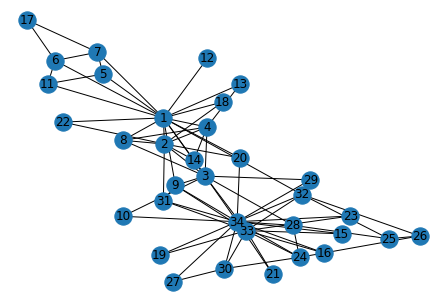

In [53]:
nx.draw(G, with_labels=True)

In [57]:
def degree_dist(G, plot_flag = 1):
    degrees = dict(G.degree())
    degree_values = sorted(set(degrees.values()))
    
    histogram = [list(dict(degrees).values()).count(i)/
             float(nx.number_of_nodes(G))
             for i in degree_values]
    
    if plot_flag:
        import matplotlib.pyplot as plt
        plt.bar(degree_values, histogram)
        plt.xlabel('Degree')
        plt.ylabel('Fraction of nodes')
        plt.show()
    
    return degree_values, histogram

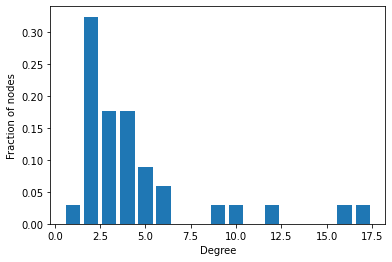

In [58]:
degree_values, histogram = degree_dist(G)

The same can be viewed for viewing the in-degree distributions of a directed network using `in_degrees = G.in_degree()`.

Preferential attachment model- if you bring in a new node, where should it attach? Favor nodes with higher degrees. The rich get richer.

* Start with two nodes connected by an edge  
* At each time step, add a new node with an edge connecting it to an existing node  
* Choose the node to connect to at random with probability proportional to each node's degree  
* The probability of connecting to a node $u$ of degree $k_u$ is $k_u/\Sigma_j  k_j$

This approaches a power law, because as a node gets more edges, it is more likely to get more edges.

This creates a law with:  
* small shortest paths  
* very small clustering coefficient  

Generate a network using this model.

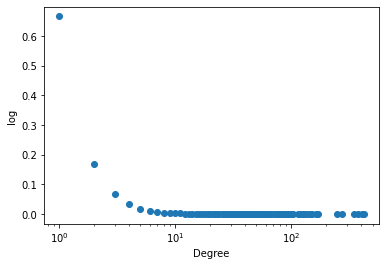

In [32]:
G = nx.barabasi_albert_graph(1e5,1) # Returns a network with 1e5 nodes
                                    # each new node attaches to 1 existing node
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(dict(degrees).values()).count(i)/
             float(nx.number_of_nodes(G))
             for i in degree_values]

plt.plot(degree_values, histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.xscale('log')
plt.ylabel('log')
plt.show()

There are a few nodes with high degrees because they have gotten all of the connections. 

# Small world networks

The small world phenomenon suggests that we are all connected by very short paths to each other. The average path length between people in facebook is 5.28 globally and even shorter in the US. 

Let's revisit the clustering coefficient: reminder, the *local clustering coefficient of a node* is the fraction of a node's friends who are friends with each other. Social networks tend to have high clustering coefficient and low average path length. 

* As the number of nodes increases, the average clustering decreases  
* As the number of nodes increases, the average clustering increases  

The **small world model** simulates a real network with high clustering coefficient and small average shortest paths:  
* Start with a ring of $n$ nodes, where each node is connected to its $k$ nearest neighbors  
* Fix a parameter $p$ in [0,1]  
* Consider each edge $(u,v)$. With probability $p$, select a node $w$ at random and rewire the edge $(u,v)$ so it becomes $(u,w)$ - you are moving edges from the neighbors to another node across the ring  

As $p$ increases from 0 to 0.1:  
* average shortest path decreases rapidly  
* average clustering coefficient decreases slowly  

An instance of a network of 1000 nodes, $k = 6$, and $p = 0.04$ has:  
* 8.99 average shortest path  
* 0.53 average clustering coefficient  

`watts_strogatz_graph(n,k,p)` returns a small world network with $n$ nodes, starting with a ring lattice and each node connected to its $k$ nearest neighbors, and rewiring probability $p$.

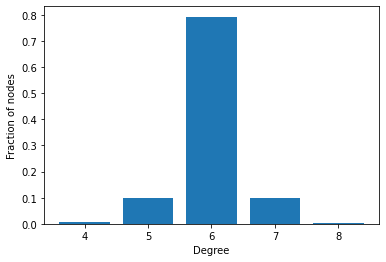

In [34]:
G = nx.watts_strogatz_graph(1000,6,0.04)
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(dict(degrees).values()).count(i)/
             float(nx.number_of_nodes(G))
             for i in degree_values]

plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()

# Link prediction

* What new edges are likely to form in this network?  
* Given a pair of nodes, how can we assess whether they are likely to connect?  
Remember **triadic closure**, which is the tendency for people to share connections with each other.  How should we best  measure this?

Measure 1: **Number of common neighbors** of $X$ and $Y$:  

$\text{comm_neigh}(X,Y) = |N(X)\cap N(Y)|$

where $N(X)$ is the set of neighbors of node $X$.

Measure 2: **Jaccard Coefficient**- the number of common neighbors normalized by the total number of neighbors  

$\text{jacc_coeff}(X,Y) = \frac{|N(X)\cap N(Y)|}{|N(X) \cup N(Y)|}$

Note that in the denomenator, the common neighbors are not double-counted.

In [35]:
L = list(nx.jaccard_coefficient(G))

In [39]:
L[:10]

[(344, 345, 0.6666666666666666),
 (46, 47, 0.5714285714285714),
 (100, 101, 0.5714285714285714),
 (103, 104, 0.5714285714285714),
 (127, 128, 0.5714285714285714),
 (146, 147, 0.5714285714285714),
 (150, 151, 0.5714285714285714),
 (176, 177, 0.5714285714285714),
 (206, 207, 0.5714285714285714),
 (286, 287, 0.5714285714285714)]

Measure 3: **Resource allocation**- the fraction of a "resource" that a node can send to another through their common neighbors. The resource allocation index of nodes $X$ and $Y$ is:

$\text{res_alloc}(X,Y) = \Sigma_{u \in N(X) \cap N(Y)}\frac{1}{|N(u)|}$

If $X$ is trying to pass a unit to $Y$ through $Z$, then $X$ sends 1 unit to $Z$, and $Z$ distributes the unit evenly among all  neighbors, and then $Y$ receives $1/n$ of the unit.

Resource allocation penalizes sets of nodes that have a lot of common neighbors.

Measure 4: **Adamic-Adar Index**, which is similar to resource allocation index, but with log in the denomenator.

$\text{adamic_adar}(X,Y) = \Sigma_{u \in N(X) \cap N(Y)}\frac{1}{log(|N(u)|)}$

Measure 5: **Preferential attachment**- nodes with high degree get more neighbors, so let's simply take the product of the nodes' degrees.

$\text{pref_attach(X,Y)} = |N(X)||N(Y)|$

In [40]:
L = list(nx.preferential_attachment(G))
L[:10]

[(0, 4, 36),
 (0, 5, 36),
 (0, 6, 36),
 (0, 7, 36),
 (0, 8, 36),
 (0, 9, 36),
 (0, 10, 36),
 (0, 11, 36),
 (0, 12, 36),
 (0, 13, 36)]

Measure 6: **Community common neighbors**- the number of common neighbors with bonus for neighbors in the same community. Use the Common Neighbor Soundarajan-Hopcroft score:

$\text{cn_soundarajan_hopcroft}(X,Y) = |N(X)\cap N(Y)| + \Sigma_{u\in N(X)\cap N(Y)} f(u)$

where $f(u) is 1 or 0, depending on if those nodes are in the same community. To use this in `networkX`, we have to add an attribute to each node telling it which community each node belongs in. 

    G.node['A']['community'] = 0  
    G.node['H']['community'] = 1
    
    L = list(nx.cn_sounarajan_hopcroft(G))

Measure 7: **Community resource allocation**- similar to resource allocation index, but only considering nodes in the same community. 

$\text{ra_soundarajan_hopcroft}(X,Y) = \Sigma_{u \in N(X) \cap N(Y)}\frac{f(u)}{|N(u)|'}$

where again, $f(u)$ is 1 if neighbors are in the same community and 0 if they are not. $N(u)$ is the number of neighbors of the shared node that you are evaluating. 

# Quiz

I'm going to build some of the questions here to get the answers.

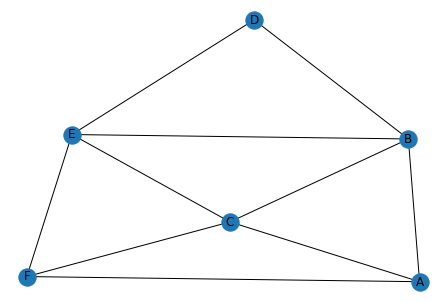

In [45]:
G = nx.Graph()

G.add_edge('A','F'); G.add_edge('A','C'); G.add_edge('A','B'); 
G.add_edge('B','C'); G.add_edge('B','E'); G.add_edge('B','D'); 
G.add_edge('C','F'); G.add_edge('C','E'); G.add_edge('D','E'); 
G.add_edge('E','F');

nx.draw(G,with_labels=True)

2 0.16666666666666666
3 0.3333333333333333
4 0.5


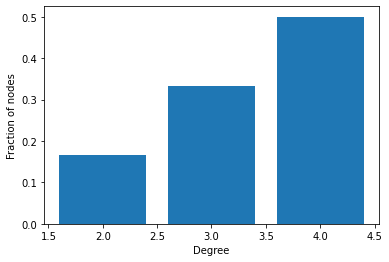

In [50]:
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))

histogram = [list(dict(degrees).values()).count(i)/
             float(nx.number_of_nodes(G))
             for i in degree_values]

for (item1,item2) in zip(degree_values,histogram):
    print(item1,item2)

import matplotlib.pyplot as plt
plt.bar(degree_values, histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of nodes')
plt.show()